<a href="https://colab.research.google.com/github/VielF/ColabProjects/blob/main/Pr%C3%A1tica_Filtragem_no_Dom%C3%ADnio_da_Frequ%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade do Vale do Itajaí<br>
Escola Politécnica<br>
Processamento Digital de Sinais: Imagens

# Prática com Filtros no domínio da Frequência

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

## Usando a DFT e FFT da OpenCV

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#from google.colab.patches import cv2_imshow


In [ ]:
img = cv2.imread('dataFreq/Fig0424(a)(rectangle).tif',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = (20*np.log(np.abs(fshift) + 0.00001)/255)
magnitude_spectrum = np.array(magnitude_spectrum, dtype=np.float32)

#cv2_imshow(img)

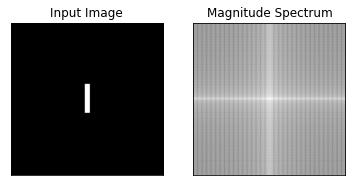

In [ ]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


#mostrando a imagem de entrada
cv2.imshow('in', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#mostrando a magnitude da TF
cv2.imshow('magnitude_spectrum', magnitude_spectrum)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
img = cv2.imread('dataFreq/t1.jpg',0)
image_f32 = ? # convert from uint8 into float32
dft = cv2.dft(image_f32, flags = cv2.DFT_COMPLEX_OUTPUT)
fft_shift = np.fft.fftshift(dft) #aplica FFT e posteriormente a desloca - dica é usar a função presente na numpy
magnitude_spectrum = 20*np.log(?) # cria o espectro de magnitude 

#caso use o colab, utilize o patch corretamente
cv2.imshow('img', img) 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#criação da filtro PB ideal
rows, cols = img.shape
crow, ccol = rows//2 , cols//2
mask = np.zeros((rows,cols,2), np.uint8) # H(u,v)
raio = ? #valor inteiro que irá cortar mais ou menos frequências
mask[?, ?] = ?   # filtragem circular - preencher com o valor complementar a zero para que na multiplicação seja mantido o valor

53413


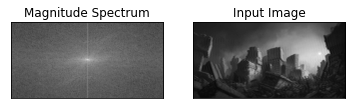

In [ ]:
# apply mask and inverse DFT
fshift = ?  # multiplicação posicional entre o FFT e a mascará - se fosse multiplicação de matrizes, usaria-se @ ou np.dot()
f_ishift = ? # aplicar a FFT inversa - a dica é usar a presente na lib Numpy
img_back = ? # aplicar a DFT - a dica é usar a presente na OpenCV
img_back = cv2.magnitude(?)  # calcular a magnitude após a DFT



img_back = np.array(img_back, dtype=np.float32)
print(np.argmax(img_back))
plt.subplot(121),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()

#caso use o colab, utilize o patch corretamente
cv2.imshow('img_back', img_back)
cv2.waitKey(0)
cv2.destroyAllWindows()

# usar para normalizar a imagem e poder exibir com a imshow() da opencv para deixar entre 0 e 255
'''
 Pode-se seguir as dicas a seguir para implementar essa normalização
    - Aplicar o absoluto, seguido pela subtração entre os valores - np.abs
    - Subtrair os valores dos pixels do valor do menor pixel - .min
    - Multiplcar a imagem por 255 e dividir pelo pixel de maior valor - .max
    - fazer um cast para 8 bits pela própria Numpy - astype()
'''
filtered_img = ?
filtered_img -= ?
filtered_img = ?
filtered_img = ?

#caso use o colab, utilize o patch corretamente
cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#criação da filtro PA - segue-se o principio do PB, porém inverso
rows, cols = img.shape
crow, ccol = rows//2 , cols//2
mask = np.ones(?)
raio = ?
mask[?] = ?

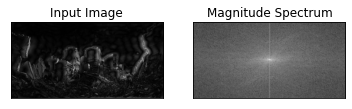

In [ ]:
# apply mask and inverse DFT
fshift = ? # multiplicação posicional entre o FFT e a mascará - se fosse multiplicação de matrizes, usaria-se @ ou np.dot()
f_ishift = ?  #inversa da fft
img_back = ? #inversa da dft
img_back = cv2.magnitude(?)  #recuperando a imagem capturando a magnitude (intesidade) 


img_back = np.array(img_back, dtype=np.float32)

plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#usar para normalizar a imagem e poder exibir com a imshow() da opencv - mesmo processo anterior
'''
 Pode-se seguir as dicas a seguir para implementar essa normalização
    - Aplicar o absoluto, seguido pela subtração entre os valores - np.abs
    - Subtrair os valores dos pixels do valor do menor pixel - .min
    - Multiplcar a imagem por 255 e dividir pelo pixel de maior valor - .max
    - fazer um cast para 8 bits pela própria Numpy - astype()
'''
filtered_img = ?
filtered_img -= ?
filtered_img = ?
filtered_img = ?

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Criando outros kernels - Gaussiano e Butterworth 

### Filtro passa-baixa

O filtro passa-baixa, que retém as informações de baixa frequência da transformada de Fourier e filtra as informações de alta frequência, tornará a imagem mais desfocada. Os filtros passa-baixa comumente usados incluem filtro passa-baixo ideal, filtro passa-baixo Butterworth e filtro passa-baixo Gaussiano. Suponha que a altura e a largura da transformada de Fourier sejam H e W, o valor máximo do espectro de Fourier está no ponto central (maxR,maxC) e D(r,c) representa a distância do ponto (r,c) até o ponto central


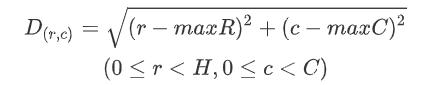


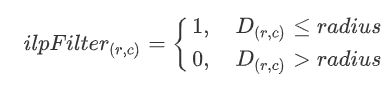


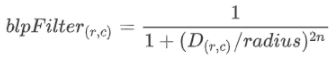


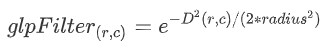

### Filtro passa-alta

O filtro passa-alta retém as informações de alta frequência da imagem e filtra as informações de baixa frequência, o que torna os detalhes da imagem mais óbvios. Os filtros passa-alta comumente usados incluem filtro passa-alto ideal, filtro passa-alto Butterworth e filtro passa-alto gaussiano. Três tipos de filtros passa-altas podem ser expressos da seguinte forma


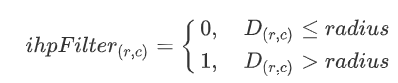

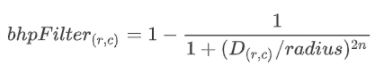


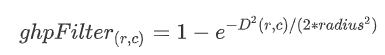

### Filtro passa-banda

O filtro passa-banda serve para reter apenas a banda de frequência de uma determinada área e filtrar as informações de frequência, que podem selecionar seletivamente parte das informações da imagem. Os filtros passa-banda comumente usados incluem filtro passa-banda ideal, filtro passa-banda Butterworth e filtro passa-banda gaussiano. Assumindo que BW representa a largura de banda e D0 representa o centro radial da largura de banda, os três filtros passa banda podem ser expressos da seguinte forma


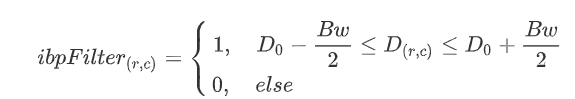


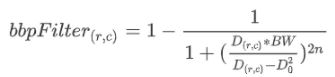


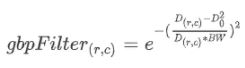

### Filtro rejeita-banda

Em contraste com o filtro passa-banda, o filtro de rejeita-banda se refere a filtrar ou enfraquecer a banda de frequência na faixa especificada. Os filtros de rejeita-banda comumente usados incluem filtro de parada de banda ideal, filtro de parada de banda Butterworth e filtro de parada de banda Gaussiana. Os três filtros de parada de banda são representados da seguinte forma


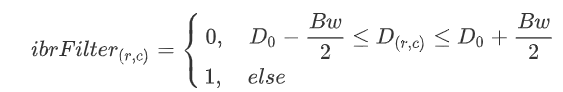


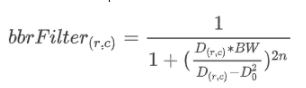

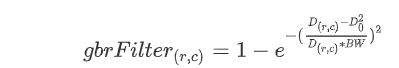

### Funções

In [ ]:
def createPB(shape, center, radius, lpType=2, n=2):
    rows, cols = shape[:2]
    r, c = ? # a dica é np.mgrid[]
    c -= center[0]
    r -= center[1]
    d = ? # a dica é usar np.power() 
    lpFilter_matrix = np.zeros(shape, np.float32)
    if lpType == 0:  # ideal low-pass filter
        lpFilter = np.copy(d)
        lpFilter[?] = 1 #selecionar a região com 1
        lpFilter[?] = 0 #selecionar a região com 0
    elif lpType == 1: #Butterworth low-pass filter 
        lpFilter = ? # implementar a função gerado do kernel
    elif lpType == 2: # Gaussian low pass filter
        lpFilter = ? # implementar a função gerado do kernel
    lpFilter_matrix[?] = lpFilter  # atribuição para criação na primeira camada
    lpFilter_matrix[?] = lpFilter # atribuição para criação na segunda camada
    return lpFilter_matrix


def createPA(shape, center, radius, lpType=2, n=2):
    rows, cols = shape[:2]
    r, c = ? # a dica é np.mgrid[]
    c -= center[0]
    r -= center[1]
    d = ? # a dica é usar np.power() 
    lpFilter_matrix = np.zeros(shape, np.float32)
    if lpType == 0:  # Ideal high pass filter
        lpFilter = np.copy(d)
        lpFilter[?] = 0 #selecionar a região com 0
        lpFilter[?] = #selecionar a região com 1
    elif lpType == 1: #Butterworth Highpass Filters 
        lpFilter = ? # implementar a função gerado do kernel
    elif lpType == 2: # Gaussian Highpass Filter 
        lpFilter = # implementar a função gerado do kernel
    lpFilter_matrix[?] = lpFilter  # atribuição para criação na primeira camada
    lpFilter_matrix[?] = lpFilter # atribuição para criação na segunda camada
    return lpFilter_matrix

def createPF(shape, center, bandCenter, bandWidth, lpType=2, n=2):
    rows, cols = shape[:2]
    r, c = ? # a dica é np.mgrid[]
    c -= center[0]
    r -= center[1]
    d = ? # a dica é usar np.power() 
    lpFilter_matrix = np.zeros(shape, np.float32)
    if lpType == 0:  # Ideal bandpass filter
        lpFilter = np.copy(d)
        lpFilter[:, :] = ? # valor da região de passagem
        lpFilter[?] = ? # selecionar e atribuir valor da região de rejeição superior
        lpFilter[?] = ? # selecionar e atribuir valor da região de rejeição inferior
    elif lpType == 1: #Butterworth bandpass filter
        lpFilter = ? # implementar a função gerado do kernel
    elif lpType == 2: # Gaussian bandpass filter
        lpFilter = # implementar a função gerado do kernel
    lpFilter_matrix[?] = lpFilter # atribuição para criação na primeira camada
    lpFilter_matrix[?] = lpFilter # atribuição para criação na segunda camada
    return lpFilter_matrix


def createRF(shape, center, bandCenter, bandWidth, lpType=2, n=2):
    rows, cols = shape[:2]
    r, c = ? # a dica é np.mgrid[]
    c -= center[0]
    r -= center[1]
    d = ? # a dica é usar np.power() 
    lpFilter_matrix = np.zeros(shape, np.float32)
    if lpType == 0:  # Ideal band stop filter
        lpFilter = np.copy(d)
        lpFilter[:, :] = ? # valor da região de rejeição
        lpFilter[?] = ? # valor da região de passagem superior
        lpFilter[?] = ? # valor da região de inferior
    elif lpType == 1: #Butterworth band stop filter
        lpFilter = # implementar a função gerado do kernel
    elif lpType == 2: # Gaussian band stop filter
        lpFilter = # implementar a função gerado do kernel
    lpFilter_matrix[?] = lpFilter # atribuição para criação na primeira camada
    lpFilter_matrix[?] = lpFilter # atribuição para criação na segunda camada
    return lpFilter_matrix

In [ ]:
img = cv2.imread('dataFreq/t1.jpg',0)
image_f32 = ? # convert from uint8 into float32
dft = ? #aplicar DFT - a dica é cv2.dft()
fft_shift = ? #aplicar FFT e deslocamento da FFT
magnitude_spectrum = ? # aplicar o calculo de spectro de magnitude - 20*log() e cv2. magnitude() utilizando DFT

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

'''
 Pode-se seguir as dicas a seguir para implementar essa normalização
    - Aplicar o absoluto, seguido pela subtração entre os valores - np.abs
    - Subtrair os valores dos pixels do valor do menor pixel - .min
    - Multiplcar a imagem por 255 e dividir pelo pixel de maior valor - .max
    - fazer um cast para 8 bits pela própria Numpy - astype()
'''
magnitude_spectrum = ?
magnitude_spectrum -= ?
magnitude_spectrum = ?
magnitude_spectrum = ?

cv2.imshow('magnitude_spectrum', magnitude_spectrum)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
nrows, ncols = ?# pegar o tamanho da imagem np.shape da imagem no domínio da frequência - cuidado com a camada usada
real = ? # pegar o valor real - np.power na primeira camada
imaginary = ? # pegar o valor real - np.power na segunda camada
amplitude = ? # aplica a raiz quadrada entre as duas componetes do número complexo- np.sqrt()
minValue, maxValue, minLoc, maxLoc = ? # extrais os valores extremos e posições usando o valor gerado na amplitude - cv2.minMaxLoc()

In [ ]:
maskPB = createPB(fft_shift.shape, center=maxLoc, radius=35, lpType=1, n=2)
maskPA = createPA(dft_shift.shape, center=maxLoc, radius=35, lpType=1, n=1)
maskPF = createPF(shape=dft_shift.shape, center=maxLoc, bandCenter=1, bandWidth=400, lpType=2, n=2)
maskRF = createRF(shape=dft_shift.shape, center=maxLoc, bandCenter=50, bandWidth=50, lpType=2, n=2)

filtered_freq = ? #multiplicação da imagem no domínio da frequência pelo kernel 
f_ishift = ?  #inversa da fft - cuidado com o deslocamento
img_back = ?        #inversa da dft - cv2.dft
img_back = ? #recuperando a imagem capturando a magnitude (intesidade) - cv2.magnitude


img_back = np.array(img_back, dtype=np.float32)

#plotando sem regularização com matplotlib
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#usar para normalizar a imagem e poder exibir com a imshow() da opencv
'''
 Pode-se seguir as dicas a seguir para implementar essa normalização
    - Aplicar o absoluto, seguido pela subtração entre os valores - np.abs
    - Subtrair os valores dos pixels do valor do menor pixel - .min
    - Multiplcar a imagem por 255 e dividir pelo pixel de maior valor - .max
    - fazer um cast para 8 bits pela própria Numpy - astype()
'''
filtered_img = ?
filtered_img -= ?
filtered_img = ?
filtered_img = ?

#plotando com a OpenCV
cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()




In [ ]:
maskPA = createPA(dft_shift.shape, center=maxLoc, radius=35, lpType=1, n=1)


filtered_freq = ? #multiplicação da imagem no domínio da frequência pelo kernel 
f_ishift = ?  #inversa da fft - cuidado com o deslocamento
img_back = ?        #inversa da dft - cv2.dft
img_back = ? #recuperando a imagem capturando a magnitude (intesidade) - cv2.magnitude


img_back = np.array(img_back, dtype=np.float32)

#plotando sem regularização com matplotlib
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#usar para normalizar a imagem e poder exibir com a imshow() da opencv
'''
 Pode-se seguir as dicas a seguir para implementar essa normalização
    - Aplicar o absoluto, seguido pela subtração entre os valores - np.abs
    - Subtrair os valores dos pixels do valor do menor pixel - .min
    - Multiplcar a imagem por 255 e dividir pelo pixel de maior valor - .max
    - fazer um cast para 8 bits pela própria Numpy - astype()
'''
filtered_img = ?
filtered_img -= ?
filtered_img = ?
filtered_img = ?

#plotando com a OpenCV
cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
maskPF = createPF(shape=dft_shift.shape, center=maxLoc, bandCenter=1, bandWidth=400, lpType=2, n=2)

filtered_freq = ? #multiplicação da imagem no domínio da frequência pelo kernel 
f_ishift = ?  #inversa da fft - cuidado com o deslocamento
img_back = ?        #inversa da dft - cv2.dft
img_back = ? #recuperando a imagem capturando a magnitude (intesidade) - cv2.magnitude


img_back = np.array(img_back, dtype=np.float32)

#plotando sem regularização com matplotlib
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#usar para normalizar a imagem e poder exibir com a imshow() da opencv
'''
 Pode-se seguir as dicas a seguir para implementar essa normalização
    - Aplicar o absoluto, seguido pela subtração entre os valores - np.abs
    - Subtrair os valores dos pixels do valor do menor pixel - .min
    - Multiplcar a imagem por 255 e dividir pelo pixel de maior valor - .max
    - fazer um cast para 8 bits pela própria Numpy - astype()
'''
filtered_img = ?
filtered_img -= ?
filtered_img = ?
filtered_img = ?

#plotando com a OpenCV
cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
maskRF = createRF(shape=dft_shift.shape, center=maxLoc, bandCenter=50, bandWidth=50, lpType=2, n=2)

filtered_freq = ? #multiplicação da imagem no domínio da frequência pelo kernel 
f_ishift = ?  #inversa da fft - cuidado com o deslocamento
img_back = ?        #inversa da dft - cv2.dft
img_back = ? #recuperando a imagem capturando a magnitude (intesidade) - cv2.magnitude


img_back = np.array(img_back, dtype=np.float32)

#plotando sem regularização com matplotlib
plt.subplot(121),plt.imshow(img_back, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

#usar para normalizar a imagem e poder exibir com a imshow() da opencv
'''
 Pode-se seguir as dicas a seguir para implementar essa normalização
    - Aplicar o absoluto, seguido pela subtração entre os valores - np.abs
    - Subtrair os valores dos pixels do valor do menor pixel - .min
    - Multiplcar a imagem por 255 e dividir pelo pixel de maior valor - .max
    - fazer um cast para 8 bits pela própria Numpy - astype()
'''
filtered_img = ?
filtered_img -= ?
filtered_img = ?
filtered_img = ?

#plotando com a OpenCV
cv2.imshow('filtered_img', filtered_img)
cv2.waitKey(0)
cv2.destroyAllWindows()